# Iris Dataset Classification with apenet's Neural Network

This notebook demonstrates how to build, train, and evaluate a neural network model using the apenet library, using the Iris Dataset as an example.

## Import Libraries

In [82]:
import torch
## Data processing
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import our library
from apenet.models.builder import ModelBuilder
from apenet.train.trainer import Trainer
from apenet.utils.data import train_test_split
from apenet.loss.losses import CrossEntropyLoss
from apenet.optimizers.optimizers import StochGradDescent

## Set device

In [83]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device = "cpu"
print(f"Using device: {device}")

Using device: cpu


# Data Overview

## Load and Preprocess Data


In [84]:
# Load and preprocess data
dataset = load_digits()
X = torch.tensor(dataset.data, dtype=torch.float32, device=device)
y = torch.tensor(dataset.target, dtype=torch.long, device=device)


## Data Visualization

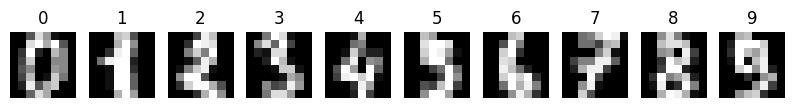

In [85]:
# Visualize some examples from the dataset
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(dataset.images[i], cmap='gray')
    ax.set_title(dataset.target[i])
    ax.axis('off')
plt.show()

## Data Preprocessing


In [86]:
# Standardize features
scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(X.cpu().numpy()), dtype=torch.float32, device=device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the sizes of the training and test datasets
print(f"Training dataset size: {X_train.shape}")
print(f"Test dataset size: {X_test.shape}")

Training dataset size: torch.Size([1438, 64])
Test dataset size: torch.Size([359, 64])


# Model Overview

## Create Model


In [87]:
builder = ModelBuilder()
model = builder.build_mlp(
    input_size=X_train.shape[1],
    hidden_sizes=[64, 32],
    output_size=10,
    hidden_activation='tanh',
    output_activation=None,
    initializer='Xavier'
)


## Define Loss Function and Optimizer


In [88]:
loss_fn = CrossEntropyLoss()
optimizer = StochGradDescent(model.get_parameters(), learning_rate=0.01)

## Create Trainer


In [89]:
# Create trainer
trainer = Trainer(model, loss_fn, optimizer)


## Train Model


In [90]:
# Train model
history = trainer.train(
    epochs=500,
    batch_size=16,
    verbose=10,
    X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test
)


Epoch 10/500: train_loss=1.6658, train_accuracy=0.4736, val_loss=1.6746, val_accuracy=0.4847
Epoch 20/500: train_loss=1.2364, train_accuracy=0.7302, val_loss=1.2667, val_accuracy=0.6852
Epoch 30/500: train_loss=0.9806, train_accuracy=0.8241, val_loss=1.0184, val_accuracy=0.7911
Epoch 40/500: train_loss=0.8130, train_accuracy=0.8644, val_loss=0.8534, val_accuracy=0.8273
Epoch 50/500: train_loss=0.6956, train_accuracy=0.8853, val_loss=0.7364, val_accuracy=0.8524
Epoch 60/500: train_loss=0.6087, train_accuracy=0.8978, val_loss=0.6489, val_accuracy=0.8802
Epoch 70/500: train_loss=0.5414, train_accuracy=0.9089, val_loss=0.5805, val_accuracy=0.8914
Epoch 80/500: train_loss=0.4875, train_accuracy=0.9207, val_loss=0.5255, val_accuracy=0.8942
Epoch 90/500: train_loss=0.4434, train_accuracy=0.9284, val_loss=0.4802, val_accuracy=0.9081
Epoch 100/500: train_loss=0.4066, train_accuracy=0.9332, val_loss=0.4423, val_accuracy=0.9164
Epoch 110/500: train_loss=0.3754, train_accuracy=0.9395, val_loss=0.4

## Evaluate Model


In [91]:
# Evaluate model
metrics = trainer.evaluate(X_test, y_test)
print(f"Test Loss: {metrics['loss']:.4f}, Test Accuracy: {metrics['accuracy']:.4f}")

Test Loss: 0.1353, Test Accuracy: 0.9777


## Plot Training History


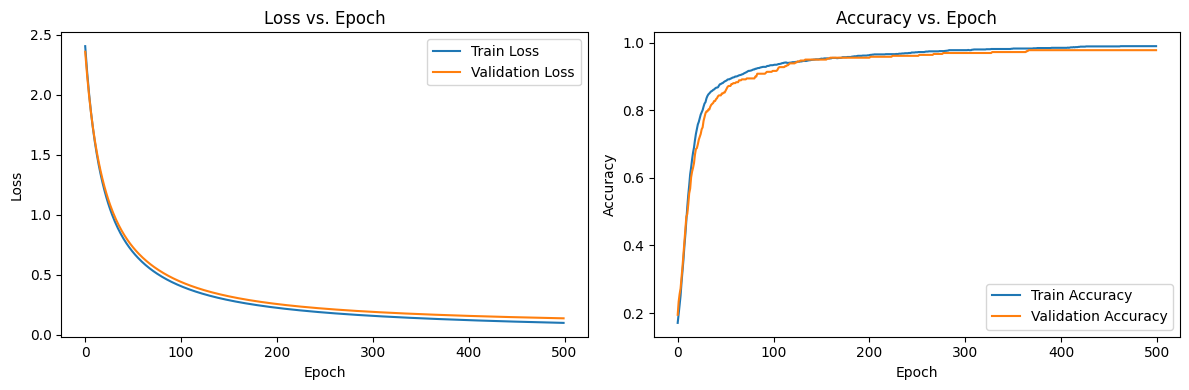

In [92]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()
